In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

from pylab import cm
from matplotlib import colors as mcol

from netCDF4 import Dataset as NetCDFFile

In [16]:
pd_data = pd.read_csv('results-mk-lc.txt', sep=',', index_col='site')

In [11]:
def do_gpr(X,y):
    kf = KFold(n_splits=10, shuffle=True)
    kf.get_n_splits(X)
    r2_list = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
        gpr = GaussianProcessRegressor(kernel=kernel, \
                                       n_restarts_optimizer=15, \
                                       alpha=0.1, normalize_y=True)
        gpr.fit(X_train, y_train)

        y_hat = gpr.predict(X_test, return_std=False) 
        rmse = np.sqrt(np.mean((y_test - y_hat)**2))
        r2 = r2_score(y_test, y_hat)
        r2_list.append(r2)
        plt.scatter(y_hat,y_test)
        print(r2)
    print('Average r-squared value = {:.2f}'.format(np.mean(r2_list)))

0.3268638808944714
0.42747808996577497
0.46784284075361926
0.4778363264410197
0.42593668506559923
0.5192914377059921
0.39388597568044015
0.5525448345518774
0.5372543993245449
0.6049508480916117
Average r-squared value = 0.47


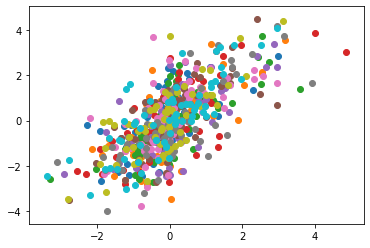

In [9]:
X=np.array(pd_data.loc[:,['lat','lon']])
y=np.array(pd_data['Q/P'])
do_gpr(X,y)

-0.29364089134986937
-0.494152526619583
-1.3585096826060177
-0.8158888273920115
-1.0249211921880095
-0.45472517240126664
-0.20070164239308008
-0.545640594451686
-0.5663716648912365
-0.4471833691466818
Average r-squared value = -0.62


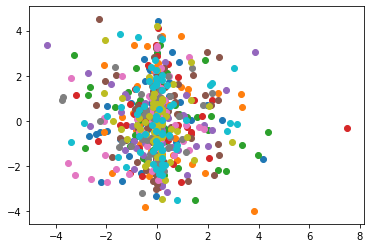

In [17]:
d_drop = pd_data.loc[:,['tree_canopy_cover', 'impervious']].dropna()
X=np.array(d_drop)
y=np.array(pd_data['Q/P'])
do_gpr(X,y)

0.11839938890512836
0.1293265676507318
0.18605093550663365
0.34524321822820536
0.4617028076640707
0.2707160525143514
0.29561935782766713
0.29933348555131
0.4430283597378456
0.4378696639174504
Average r-squared value = 0.30


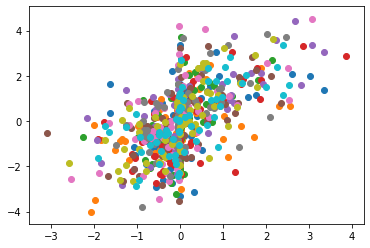

In [20]:
d_drop = pd_data.loc[:,['lat', 'lon', 'tree_canopy_cover', 'impervious']].dropna()
X=np.array(d_drop)
y=np.array(pd_data['Q/P'])
do_gpr(X,y)

0.37936251806030086
0.3609581841222794
0.06126252155705059
0.2701204600629131
0.34803597214992543
0.32584079470564475
0.2704849627853574
0.35862671221031694
0.4449499344806116
0.46518200389042075
Average r-squared value = 0.33


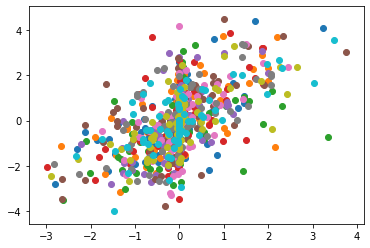

In [15]:
X=np.array(pd_data.loc[:,['potential_evaporation',
                          'skin_temperature',
                          'soil_temperature_level_1',
                          'evaporation_from_vegetation_transpiration']])
y=np.array(pd_data['Q/P'])
do_gpr(X,y)

0.5856446449023677
0.5490944412839882
0.4180112514319235
0.380147263856095
0.4374529372855449
0.5843967845298657
0.6373262187859723
0.48357838836281275
0.5686890054984544
0.47539390793199965
Average r-squared value = 0.51


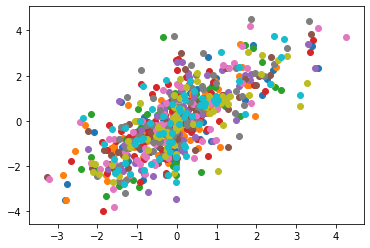

In [19]:
X=np.array(pd_data.loc[:,['potential_evaporation',
                          'skin_temperature',
                          'soil_temperature_level_1',
                          'evaporation_from_vegetation_transpiration',
                          'lat','lon']].dropna())
y=np.array(pd_data['Q/P'])
do_gpr(X,y)

0.3328213297004282
0.28130156480513624
0.45192932790926754
0.2123779193472587
0.3950914618200124
0.3429372621244705
0.38499580087806107
0.35128451798816474
0.4599720578398103
0.1936492587228663
Average r-squared value = 0.34


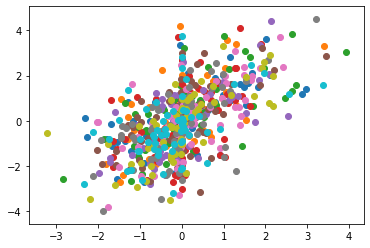

In [18]:
X=np.array(pd_data.loc[:,['potential_evaporation',
                          'skin_temperature',
                          'soil_temperature_level_1',
                          'evaporation_from_vegetation_transpiration',
                          'lat','lon',
                          'tree_canopy_cover', 'impervious']].dropna())
y=np.array(pd_data['Q/P'])
do_gpr(X,y)